In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [ ]:
df = pd.read_csv('diamonds_hw.csv')

In [ ]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Kolom-kolom dari dataset 'diamonds.csv' memiliki definisi sebagai berikut:
- price: price in US dollars ($326--$18,823)
- carat: weight of the diamond (0.2--5.01)
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from J (worst) to D (best)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: length in mm
- y: width in mm
- z: depth in mm
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y)
- table: width of top of diamond relative to widest point


### Soal:

1. Terdapat beberapa kolom yang mengalami missing value. Tentukan metode terbaik untuk mengisi missing value pada kolom tersebut. Terapkan metode tersebut, dan berikan argumen Anda! (Tuliskan, "saya memilih metode __ untuk mengisi missing value pada kolom __ karena ___).

2. Berdasarkan informasi terkait kolom `clarity`, lakukanlah encoding yang sesuai (ubahlah kolom `clarity` dari kategorikal menjadi numerik).

2. Buatlah visualisasi boxplot untuk memeriksa distribusi pada kolom-kolom 'x', 'y', dan 'z'. Apakah ada data-data yang outlier? Jika ya, apa saja outlier yang muncul? Berapa banyak baris yang mengalami outlier?

#### Nomor 1:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53815 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
## terdapat missing value pada kolom carat sebanyak:
53940-53815

125

In [ ]:
125/53940

0.0023173896922506487

In [ ]:
## hanya 0,2% saja yg terdapat missing value
1/100 > 125/53940

True

In [ ]:
## copy dataset sebelum dilakukan cleaning supaya dataset asli tetap aman
df_update = df.copy()

In [ ]:
## dataset copy sudah ada
df_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53815 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
## memunculkan semua baris yang terdapat missing value
df_update[df_update['carat'].isnull()]

,carat,cut,color,clarity,depth,table,price,x,y,z
194,NaN,Premium,E,SI1,61.2,57.0,2777,5.73,5.68,3.49
241,NaN,Fair,E,I1,64.5,58.0,2788,6.29,6.21,4.03
251,NaN,Good,G,SI2,61.0,61.0,2789,5.94,5.99,3.64
644,NaN,Very Good,F,SI2,63.2,58.0,2843,5.91,5.92,3.74
704,NaN,Fair,J,VS2,65.4,60.0,2854,6.04,6.00,3.94
...,...,...,...,...,...,...,...,...,...,...
50207,NaN,Ideal,F,VS1,60.3,57.0,2227,5.47,5.44,3.29
50559,NaN,Premium,H,SI1,62.7,59.0,2277,5.69,5.73,3.58
53019,NaN,Very Good,H,VS2,58.7,61.0,2599,5.96,5.99,3.51
53234,NaN,Ideal,F,SI1,61.9,57.0,2642,5.88,5.91,3.65


In [ ]:
## memunculkan semua baris kecuali baris yang terdapat missing value
df_update[~df_update['carat'].isnull()]

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
## karena baris yang terdapat missing value pada kolom carat hanya 0,2%, yaitu 125 baris dari total 53940 baris
## maka kita hilangkan semua baris yang terdapat missing value dengan cara,
## mengganti dataset baru dengan dataset yang tanpa missing value, jgn lupa mereset index
df_update = df_update[~df_update['carat'].isnull()].reset_index(drop = True)

In [ ]:
## cek dataset info untuk memastikan dataset sudah clear dari missing value
df_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53815 entries, 0 to 53814
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53815 non-null  float64
 1   cut      53815 non-null  object 
 2   color    53815 non-null  object 
 3   clarity  53815 non-null  object 
 4   depth    53815 non-null  float64
 5   table    53815 non-null  float64
 6   price    53815 non-null  int64  
 7   x        53815 non-null  float64
 8   y        53815 non-null  float64
 9   z        53815 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Saya memilih metode remove the rows untuk mengatasi missing value yang terdapat pada kolom carat tersebut karena missing valuenya hanya 0,2% dari dataset yang ada yaitu 125 baris missing value dari total 53940 baris yang ada. Dan, untuk memperkecil resiko dilakukannya metode ini, saya menyimpan dataset asli dan membuat copy dataset untuk dilakukan cleaning data.

#### Nomor 2
#### Soal: Berdasarkan informasi terkait kolom clarity, lakukanlah encoding yang sesuai (ubahlah kolom clarity dari kategorikal menjadi numerik).

In [ ]:
## saya ambil dari dataset yang sudah dilakukan cleaning data
df_update['clarity']

0        SI2
1        SI1
2        VS1
3        VS2
4        SI2
        ... 
53810    SI1
53811    SI1
53812    SI1
53813    SI2
53814    SI2
Name: clarity, Length: 53815, dtype: object

In [ ]:
## melakukan one-hot encoding pada kolom clarity
## saya tambahkan prefix untuk awalan 'clarity' pada tiap nama kolom
pd.get_dummies(df_update['clarity'], prefix='clarity')

,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
53810,0,0,1,0,0,0,0,0
53811,0,0,1,0,0,0,0,0
53812,0,0,1,0,0,0,0,0
53813,0,0,0,1,0,0,0,0


In [ ]:
## menambahkan hasil encode ke dalam dataset
df_update = df_update.join(pd.get_dummies(df_update['clarity'], prefix='clarity'))

In [ ]:
df_update

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,0,0,1,0,0,0,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0,0,1,0,0,0,0,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0,0,0,0,1,0,0,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53810,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,0,0,0,0,0
53811,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,0,0,1,0,0,0,0,0
53812,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,0,0,1,0,0,0,0,0
53813,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,1,0,0,0,0


In [ ]:
## menghilangkan kolom clarity yang pertama
df_update.drop(['clarity'], axis = 'columns', inplace = True)

In [ ]:
df_update

,carat,cut,color,depth,table,price,x,y,z,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,Ideal,E,61.5,55.0,326,3.95,3.98,2.43,0,0,0,1,0,0,0,0
1,0.21,Premium,E,59.8,61.0,326,3.89,3.84,2.31,0,0,1,0,0,0,0,0
2,0.23,Good,E,56.9,65.0,327,4.05,4.07,2.31,0,0,0,0,1,0,0,0
3,0.29,Premium,I,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0,0
4,0.31,Good,J,63.3,58.0,335,4.34,4.35,2.75,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53810,0.72,Ideal,D,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,0,0,0,0,0
53811,0.72,Good,D,63.1,55.0,2757,5.69,5.75,3.61,0,0,1,0,0,0,0,0
53812,0.70,Very Good,D,62.8,60.0,2757,5.66,5.68,3.56,0,0,1,0,0,0,0,0
53813,0.86,Premium,H,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,1,0,0,0,0


selesai. sekarang kolom clarity yang berisi data kategori sudah hilang dan digantikan kolom-kolom clarity dengan data numerik

In [ ]:
df_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53815 entries, 0 to 53814
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         53815 non-null  float64
 1   cut           53815 non-null  object 
 2   color         53815 non-null  object 
 3   depth         53815 non-null  float64
 4   table         53815 non-null  float64
 5   price         53815 non-null  int64  
 6   x             53815 non-null  float64
 7   y             53815 non-null  float64
 8   z             53815 non-null  float64
 9   clarity_I1    53815 non-null  uint8  
 10  clarity_IF    53815 non-null  uint8  
 11  clarity_SI1   53815 non-null  uint8  
 12  clarity_SI2   53815 non-null  uint8  
 13  clarity_VS1   53815 non-null  uint8  
 14  clarity_VS2   53815 non-null  uint8  
 15  clarity_VVS1  53815 non-null  uint8  
 16  clarity_VVS2  53815 non-null  uint8  
dtypes: float64(6), int64(1), object(2), uint8(8)
memory usage: 4.1+ MB


In [ ]:
## mengubah dtype kolom-kolom clarity menjadi int

for x in df_update.columns[9:]:
    df_update[x] = df_update[x].astype(int)

In [ ]:
df_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53815 entries, 0 to 53814
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         53815 non-null  float64
 1   cut           53815 non-null  object 
 2   color         53815 non-null  object 
 3   depth         53815 non-null  float64
 4   table         53815 non-null  float64
 5   price         53815 non-null  int64  
 6   x             53815 non-null  float64
 7   y             53815 non-null  float64
 8   z             53815 non-null  float64
 9   clarity_I1    53815 non-null  int64  
 10  clarity_IF    53815 non-null  int64  
 11  clarity_SI1   53815 non-null  int64  
 12  clarity_SI2   53815 non-null  int64  
 13  clarity_VS1   53815 non-null  int64  
 14  clarity_VS2   53815 non-null  int64  
 15  clarity_VVS1  53815 non-null  int64  
 16  clarity_VVS2  53815 non-null  int64  
dtypes: float64(6), int64(9), object(2)
memory usage: 7.0+ MB


#### Nomor 3
#### Soal: Buatlah visualisasi boxplot untuk memeriksa distribusi pada kolom-kolom 'x', 'y', dan 'z'. Apakah ada data-data yang outlier? Jika ya, apa saja outlier yang muncul? Berapa banyak baris yang mengalami outlier?

In [ ]:
df_update

,carat,cut,color,depth,table,price,x,y,z,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,Ideal,E,61.5,55.0,326,3.95,3.98,2.43,0,0,0,1,0,0,0,0
1,0.21,Premium,E,59.8,61.0,326,3.89,3.84,2.31,0,0,1,0,0,0,0,0
2,0.23,Good,E,56.9,65.0,327,4.05,4.07,2.31,0,0,0,0,1,0,0,0
3,0.29,Premium,I,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0,0
4,0.31,Good,J,63.3,58.0,335,4.34,4.35,2.75,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53810,0.72,Ideal,D,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,0,0,0,0,0
53811,0.72,Good,D,63.1,55.0,2757,5.69,5.75,3.61,0,0,1,0,0,0,0,0
53812,0.70,Very Good,D,62.8,60.0,2757,5.66,5.68,3.56,0,0,1,0,0,0,0,0
53813,0.86,Premium,H,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,1,0,0,0,0


### Percobaan analisa outlier pada masing-masing kolom, hanya untuk mencoba mengaplikasikan function dari hands on day 7

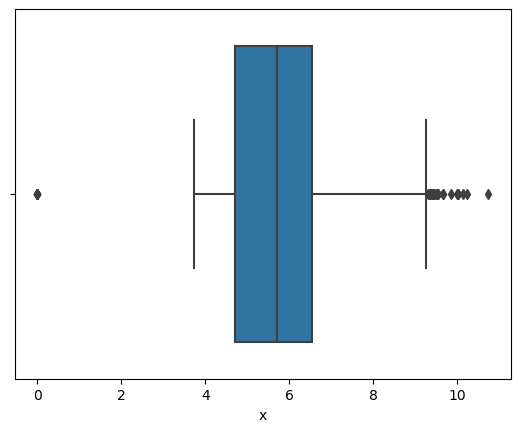

In [ ]:
## analisa outlier pada kolom x
sns.boxplot(x=df_update['x'])
plt.show()

berdasarkan gambar boxplot kolom x diatas, bisa dilihat adanya outlier pada kolom x yaitu yang x = 0. dan terlihat untuk x>9 terdapat ouliers namun dalam analisa data nantinya bisa saja angka-angka tsb bukan merupakan outlier

In [ ]:
## mencari baris mana saja yang outlier pada kolom x, dengan fungsi:
def check_outlier(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    return ['outlier' if (a<q1-1.5*iqr or a>q3+1.5*iqr)
                                 else 'not-outlier' for a in data[column].values]

In [ ]:
df_update['outlier_x']=check_outlier(data=df_update, column='x')

df_update

,carat,cut,color,depth,table,price,x,y,z,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,outlier_x
0,0.23,Ideal,E,61.5,55.0,326,3.95,3.98,2.43,0,0,0,1,0,0,0,0,not-outlier
1,0.21,Premium,E,59.8,61.0,326,3.89,3.84,2.31,0,0,1,0,0,0,0,0,not-outlier
2,0.23,Good,E,56.9,65.0,327,4.05,4.07,2.31,0,0,0,0,1,0,0,0,not-outlier
3,0.29,Premium,I,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0,0,not-outlier
4,0.31,Good,J,63.3,58.0,335,4.34,4.35,2.75,0,0,0,1,0,0,0,0,not-outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53810,0.72,Ideal,D,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,0,0,0,0,0,not-outlier
53811,0.72,Good,D,63.1,55.0,2757,5.69,5.75,3.61,0,0,1,0,0,0,0,0,not-outlier
53812,0.70,Very Good,D,62.8,60.0,2757,5.66,5.68,3.56,0,0,1,0,0,0,0,0,not-outlier
53813,0.86,Premium,H,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,1,0,0,0,0,not-outlier


In [ ]:
univariate_x = df_update[df_update['outlier_x'] == 'outlier']
univariate_x

,carat,cut,color,depth,table,price,x,y,z,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,outlier_x
11154,1.07,Ideal,F,61.6,56.0,4954,0.00,6.62,0.00,0,0,0,1,0,0,0,0,outlier
11933,1.00,Very Good,H,63.3,53.0,5139,0.00,0.00,0.00,0,0,0,0,0,1,0,0,outlier
15910,1.14,Fair,G,57.5,67.0,6381,0.00,0.00,0.00,0,0,0,0,1,0,0,0,outlier
22683,3.01,Fair,H,56.1,62.0,10761,9.54,9.38,5.31,1,0,0,0,0,0,0,0,outlier
22772,3.00,Good,I,57.0,64.0,10863,9.38,9.31,5.33,1,0,0,0,0,0,0,0,outlier
23584,3.65,Fair,H,67.1,53.0,11668,9.53,9.48,6.38,1,0,0,0,0,0,0,0,outlier
24069,3.24,Premium,H,62.1,58.0,12300,9.44,9.40,5.85,1,0,0,0,0,0,0,0,outlier
24235,3.22,Ideal,I,62.6,55.0,12545,9.49,9.42,5.92,1,0,0,0,0,0,0,0,outlier
24266,3.50,Ideal,H,62.8,57.0,12587,9.65,9.59,6.03,1,0,0,0,0,0,0,0,outlier
24458,1.56,Ideal,G,62.2,54.0,12800,0.00,0.00,0.00,0,0,0,0,0,1,0,0,outlier


In [ ]:
univariate_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 11154 to 49439
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         32 non-null     float64
 1   cut           32 non-null     object 
 2   color         32 non-null     object 
 3   depth         32 non-null     float64
 4   table         32 non-null     float64
 5   price         32 non-null     int64  
 6   x             32 non-null     float64
 7   y             32 non-null     float64
 8   z             32 non-null     float64
 9   clarity_I1    32 non-null     int64  
 10  clarity_IF    32 non-null     int64  
 11  clarity_SI1   32 non-null     int64  
 12  clarity_SI2   32 non-null     int64  
 13  clarity_VS1   32 non-null     int64  
 14  clarity_VS2   32 non-null     int64  
 15  clarity_VVS1  32 non-null     int64  
 16  clarity_VVS2  32 non-null     int64  
 17  outlier_x     32 non-null     object 
dtypes: float64(6), int64(9), 

Berdasarkan metode univariate outlier analysis di atas, terdeteksi ada 32 baris outlier dari kolom x. Dan nilai x yang terkategorikan sebagai outlier adalah sebagai berikut:

In [ ]:
univariate_x['x']

11154     0.00
11933     0.00
15910     0.00
22683     9.54
22772     9.38
23584     9.53
24069     9.44
24235     9.49
24266     9.65
24458     0.00
24754     9.42
25397     9.44
25786     9.32
25933    10.14
25934    10.02
26178     0.00
26366     9.42
26379    10.01
26469     9.86
26867     9.30
27063    10.00
27348    10.74
27362     0.00
27446     9.36
27562    10.23
27570     9.51
27581     9.44
27611     9.66
27616     9.35
27617     9.41
49438     0.00
49439     0.00
Name: x, dtype: float64

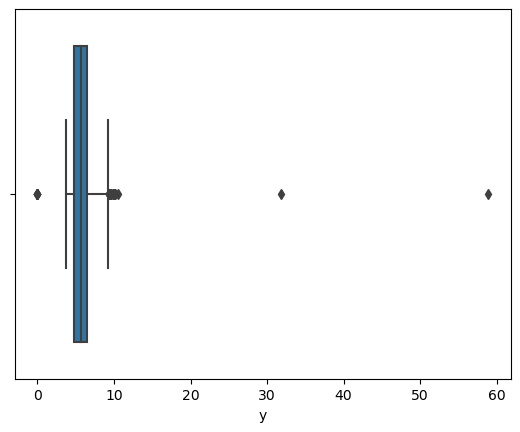

In [ ]:
## analisa outlier pada kolom y
sns.boxplot(x=df_update['y'])
plt.show()

berdasarkan gambar boxplot kolom y diatas, bisa dilihat adanya outlier yaitu yang y = 0, sedangkan untuk titik outliers yang lain akan diperiksa sebagai berikut:

In [ ]:
## menggunakan fungsi untuk menganalisa univariate outliers yang sudah terekam di atas
df_update['outlier_y']=check_outlier(data=df_update, column='y')

df_update

,carat,cut,color,depth,table,price,x,y,z,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,outlier_x,outlier_y
0,0.23,Ideal,E,61.5,55.0,326,3.95,3.98,2.43,0,0,0,1,0,0,0,0,not-outlier,not-outlier
1,0.21,Premium,E,59.8,61.0,326,3.89,3.84,2.31,0,0,1,0,0,0,0,0,not-outlier,not-outlier
2,0.23,Good,E,56.9,65.0,327,4.05,4.07,2.31,0,0,0,0,1,0,0,0,not-outlier,not-outlier
3,0.29,Premium,I,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0,0,not-outlier,not-outlier
4,0.31,Good,J,63.3,58.0,335,4.34,4.35,2.75,0,0,0,1,0,0,0,0,not-outlier,not-outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53810,0.72,Ideal,D,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,0,0,0,0,0,not-outlier,not-outlier
53811,0.72,Good,D,63.1,55.0,2757,5.69,5.75,3.61,0,0,1,0,0,0,0,0,not-outlier,not-outlier
53812,0.70,Very Good,D,62.8,60.0,2757,5.66,5.68,3.56,0,0,1,0,0,0,0,0,not-outlier,not-outlier
53813,0.86,Premium,H,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,1,0,0,0,0,not-outlier,not-outlier


In [ ]:
univariate_y = df_update[df_update['outlier_y'] == 'outlier']
univariate_y

,carat,cut,color,depth,table,price,x,y,z,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,outlier_x,outlier_y
11933,1.00,Very Good,H,63.3,53.0,5139,0.00,0.00,0.00,0,0,0,0,0,1,0,0,outlier,outlier
15910,1.14,Fair,G,57.5,67.0,6381,0.00,0.00,0.00,0,0,0,0,1,0,0,0,outlier,outlier
22683,3.01,Fair,H,56.1,62.0,10761,9.54,9.38,5.31,1,0,0,0,0,0,0,0,outlier,outlier
22772,3.00,Good,I,57.0,64.0,10863,9.38,9.31,5.33,1,0,0,0,0,0,0,0,outlier,outlier
23584,3.65,Fair,H,67.1,53.0,11668,9.53,9.48,6.38,1,0,0,0,0,0,0,0,outlier,outlier
24005,2.00,Premium,H,58.9,57.0,12210,8.09,58.90,8.06,0,0,0,1,0,0,0,0,not-outlier,outlier
24069,3.24,Premium,H,62.1,58.0,12300,9.44,9.40,5.85,1,0,0,0,0,0,0,0,outlier,outlier
24235,3.22,Ideal,I,62.6,55.0,12545,9.49,9.42,5.92,1,0,0,0,0,0,0,0,outlier,outlier
24266,3.50,Ideal,H,62.8,57.0,12587,9.65,9.59,6.03,1,0,0,0,0,0,0,0,outlier,outlier
24458,1.56,Ideal,G,62.2,54.0,12800,0.00,0.00,0.00,0,0,0,0,0,1,0,0,outlier,outlier


In [ ]:
univariate_y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 11933 to 49439
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         29 non-null     float64
 1   cut           29 non-null     object 
 2   color         29 non-null     object 
 3   depth         29 non-null     float64
 4   table         29 non-null     float64
 5   price         29 non-null     int64  
 6   x             29 non-null     float64
 7   y             29 non-null     float64
 8   z             29 non-null     float64
 9   clarity_I1    29 non-null     int64  
 10  clarity_IF    29 non-null     int64  
 11  clarity_SI1   29 non-null     int64  
 12  clarity_SI2   29 non-null     int64  
 13  clarity_VS1   29 non-null     int64  
 14  clarity_VS2   29 non-null     int64  
 15  clarity_VVS1  29 non-null     int64  
 16  clarity_VVS2  29 non-null     int64  
 17  outlier_x     29 non-null     object 
 18  outlier_y     29 non-null

Berdasarkan metode univariate outlier analysis di atas, terdeteksi ada 29 baris outlier dari kolom y. nilai y yang menjadi outliers adalah:

In [ ]:
univariate_y['y']

11933     0.00
15910     0.00
22683     9.38
22772     9.31
23584     9.48
24005    58.90
24069     9.40
24235     9.42
24266     9.59
24458     0.00
25397     9.37
25933    10.10
25934     9.94
26178     0.00
26366     9.34
26379     9.94
26469     9.81
27063     9.85
27348    10.54
27362     0.00
27446     9.31
27562    10.16
27570     9.46
27581     9.38
27611     9.63
27617     9.32
49072    31.80
49438     0.00
49439     0.00
Name: y, dtype: float64

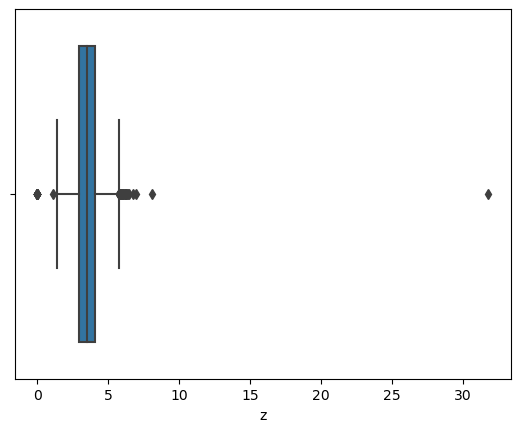

In [ ]:
## analisa outlier pada kolom z
sns.boxplot(x=df_update['z'])
plt.show()

berdasarkan gambar boxplot kolom z diatas, bisa dilihat adanya outlier yaitu yang z = 0 dan nilai outlier lain akan diperiksa sebagai berikut:

In [ ]:
## menggunakan fungsi untuk menganalisa univariate outliers yang sudah terekam di atas
df_update['outlier_z']=check_outlier(data=df_update, column='z')

df_update

,carat,cut,color,depth,table,price,x,y,z,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,outlier_x,outlier_y,outlier_z
0,0.23,Ideal,E,61.5,55.0,326,3.95,3.98,2.43,0,0,0,1,0,0,0,0,not-outlier,not-outlier,not-outlier
1,0.21,Premium,E,59.8,61.0,326,3.89,3.84,2.31,0,0,1,0,0,0,0,0,not-outlier,not-outlier,not-outlier
2,0.23,Good,E,56.9,65.0,327,4.05,4.07,2.31,0,0,0,0,1,0,0,0,not-outlier,not-outlier,not-outlier
3,0.29,Premium,I,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0,0,not-outlier,not-outlier,not-outlier
4,0.31,Good,J,63.3,58.0,335,4.34,4.35,2.75,0,0,0,1,0,0,0,0,not-outlier,not-outlier,not-outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53810,0.72,Ideal,D,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,0,0,0,0,0,not-outlier,not-outlier,not-outlier
53811,0.72,Good,D,63.1,55.0,2757,5.69,5.75,3.61,0,0,1,0,0,0,0,0,not-outlier,not-outlier,not-outlier
53812,0.70,Very Good,D,62.8,60.0,2757,5.66,5.68,3.56,0,0,1,0,0,0,0,0,not-outlier,not-outlier,not-outlier
53813,0.86,Premium,H,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,1,0,0,0,0,not-outlier,not-outlier,not-outlier


In [ ]:
univariate_z = df_update[df_update['outlier_z'] == 'outlier']

univariate_z

,carat,cut,color,depth,table,price,x,y,z,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,outlier_x,outlier_y,outlier_z
2201,1.00,Premium,G,59.1,59.0,3142,6.55,6.48,0.00,0,0,0,1,0,0,0,0,not-outlier,not-outlier,outlier
2308,1.01,Premium,H,58.1,59.0,3167,6.66,6.60,0.00,1,0,0,0,0,0,0,0,not-outlier,not-outlier,outlier
4780,1.10,Premium,G,63.0,59.0,3696,6.50,6.47,0.00,0,0,0,1,0,0,0,0,not-outlier,not-outlier,outlier
5457,1.01,Premium,F,59.2,58.0,3837,6.50,6.47,0.00,0,0,0,1,0,0,0,0,not-outlier,not-outlier,outlier
10145,1.50,Good,G,64.0,61.0,4731,7.15,7.04,0.00,1,0,0,0,0,0,0,0,not-outlier,not-outlier,outlier
11154,1.07,Ideal,F,61.6,56.0,4954,0.00,6.62,0.00,0,0,0,1,0,0,0,0,outlier,not-outlier,outlier
11933,1.00,Very Good,H,63.3,53.0,5139,0.00,0.00,0.00,0,0,0,0,0,1,0,0,outlier,outlier,outlier
13568,1.15,Ideal,G,59.2,56.0,5564,6.88,6.83,0.00,0,0,0,0,0,1,0,0,not-outlier,not-outlier,outlier
14595,1.07,Ideal,F,60.6,57.0,5909,6.62,6.67,1.07,0,0,1,0,0,0,0,0,not-outlier,not-outlier,outlier
15910,1.14,Fair,G,57.5,67.0,6381,0.00,0.00,0.00,0,0,0,0,1,0,0,0,outlier,outlier,outlier


In [ ]:
univariate_z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 2201 to 51384
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         49 non-null     float64
 1   cut           49 non-null     object 
 2   color         49 non-null     object 
 3   depth         49 non-null     float64
 4   table         49 non-null     float64
 5   price         49 non-null     int64  
 6   x             49 non-null     float64
 7   y             49 non-null     float64
 8   z             49 non-null     float64
 9   clarity_I1    49 non-null     int64  
 10  clarity_IF    49 non-null     int64  
 11  clarity_SI1   49 non-null     int64  
 12  clarity_SI2   49 non-null     int64  
 13  clarity_VS1   49 non-null     int64  
 14  clarity_VS2   49 non-null     int64  
 15  clarity_VVS1  49 non-null     int64  
 16  clarity_VVS2  49 non-null     int64  
 17  outlier_x     49 non-null     object 
 18  outlier_y     49 non-null 

Berdasarkan metode univariate outlier analysis di atas, terdeteksi ada 49 baris outlier dari kolom z. dan nilai-nilai z yang terdeteksi sebagai outlier adalah sebagai berikut:

In [ ]:
univariate_z['z']

2201      0.00
2308      0.00
4780      0.00
5457      0.00
10145     0.00
11154     0.00
11933     0.00
13568     0.00
14595     1.07
15910     0.00
16242     5.77
17155     5.76
19295     5.97
21700     5.98
22482     5.91
23479     5.79
23584     6.38
24005     8.06
24069     5.85
24235     5.92
24266     6.03
24332     0.00
24458     0.00
25933     6.17
25934     6.24
26035     5.75
26058     0.00
26129     6.16
26178     0.00
26366     6.27
26379     6.31
26469     6.13
26679     5.86
27045     0.00
27063     6.43
27348     6.98
27362     0.00
27435     0.00
27447     5.90
27448     5.90
27449     5.77
27450     5.77
27562     6.72
27611     6.03
27671     0.00
48297    31.80
49438     0.00
49439     0.00
51384     0.00
Name: z, dtype: float64

# Analisa kolom x, y dan z secara bersamaan
Seperti yang kita ketahui, diamond adalah benda berbentuk 3 dimensi. oleh karenanya, nilai dari ketiga dimensinya tidak mungkin 0. maka nilai 0 dari x, y ataupun z adalah outlier.

![cd08f880-b4f0-11eb-878d-7a636e555189.jpeg](attachment:cd08f880-b4f0-11eb-878d-7a636e555189.jpeg)

In [ ]:
df_update.describe()

,carat,depth,table,price,x,y,z,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,53815.000000,53815.000000,53815.000000,53815.000000,53815.000000,53815.000000,53815.000000,53815.000000,53815.000000,53815.000000,53815.000000,53815.000000,53815.000000,53815.000000,53815.00000
mean,0.797891,61.748957,57.456908,3932.365567,5.731029,5.734391,3.538625,0.013751,0.033169,0.242089,0.170547,0.151370,0.227334,0.067769,0.09397
std,0.474043,1.432738,2.234689,3989.612741,1.121788,1.142218,0.705737,0.116456,0.179080,0.428352,0.376116,0.358413,0.419114,0.251352,0.29179
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.040000,62.500000,59.000000,5323.500000,6.540000,6.540000,4.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


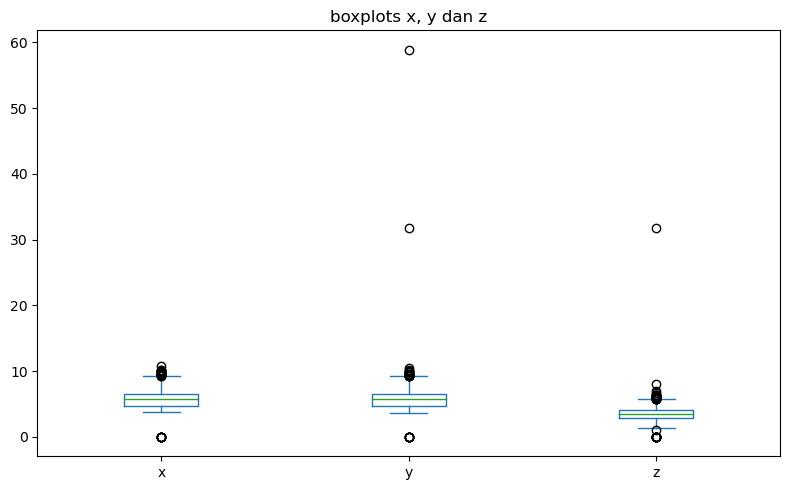

In [ ]:
## melihat boxplot dari kolom x, y dan z pada 1 gambar
plt.rcParams["figure.figsize"] = [8.0, 5.0]
plt.rcParams["figure.autolayout"] = True

df_update[['x', 'y', 'z']].plot(kind='box', title='boxplots x, y dan z')
plt.show()

terlihat dari gambar boxplot bahwa nilai 0 merupakan outliers dari ketiganya. Maka akan saya check nilai 0 tersebut.

In [ ]:
nilai_0 = df_update.loc[(df_update['x']==0) | (df_update['y']==0) | (df_update['z']==0)]

nilai_0

,carat,cut,color,depth,table,price,x,y,z,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,outlier_x,outlier_y,outlier_z
2201,1.00,Premium,G,59.1,59.0,3142,6.55,6.48,0.0,0,0,0,1,0,0,0,0,not-outlier,not-outlier,outlier
2308,1.01,Premium,H,58.1,59.0,3167,6.66,6.60,0.0,1,0,0,0,0,0,0,0,not-outlier,not-outlier,outlier
4780,1.10,Premium,G,63.0,59.0,3696,6.50,6.47,0.0,0,0,0,1,0,0,0,0,not-outlier,not-outlier,outlier
5457,1.01,Premium,F,59.2,58.0,3837,6.50,6.47,0.0,0,0,0,1,0,0,0,0,not-outlier,not-outlier,outlier
10145,1.50,Good,G,64.0,61.0,4731,7.15,7.04,0.0,1,0,0,0,0,0,0,0,not-outlier,not-outlier,outlier
11154,1.07,Ideal,F,61.6,56.0,4954,0.00,6.62,0.0,0,0,0,1,0,0,0,0,outlier,not-outlier,outlier
11933,1.00,Very Good,H,63.3,53.0,5139,0.00,0.00,0.0,0,0,0,0,0,1,0,0,outlier,outlier,outlier
13568,1.15,Ideal,G,59.2,56.0,5564,6.88,6.83,0.0,0,0,0,0,0,1,0,0,not-outlier,not-outlier,outlier
15910,1.14,Fair,G,57.5,67.0,6381,0.00,0.00,0.0,0,0,0,0,1,0,0,0,outlier,outlier,outlier
24332,2.18,Premium,H,59.4,61.0,12631,8.49,8.45,0.0,0,0,0,1,0,0,0,0,not-outlier,not-outlier,outlier


In [ ]:
len(nilai_0)

20

Terlihat di atas, ada 20 baris yang sudah pasti merupakan outlier karna nilai x dan atau y dan atau z = 0 merupakan suatu kejanggalan pada dimensi diamond. dan nilai-nilai tersebut adalah:

In [ ]:
nilai_0[['x','y','z']]

,x,y,z
2201,6.55,6.48,0.0
2308,6.66,6.60,0.0
4780,6.50,6.47,0.0
5457,6.50,6.47,0.0
10145,7.15,7.04,0.0
11154,0.00,6.62,0.0
11933,0.00,0.00,0.0
13568,6.88,6.83,0.0
15910,0.00,0.00,0.0
24332,8.49,8.45,0.0


In [ ]:
## kita coba hilangkan baris dari x dan atau y dan atau z yang = 0

diamond = df_update[(df_update[['x','y','z']] != 0).all(axis=1)]

diamond

,carat,cut,color,depth,table,price,x,y,z,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,outlier_x,outlier_y,outlier_z
0,0.23,Ideal,E,61.5,55.0,326,3.95,3.98,2.43,0,0,0,1,0,0,0,0,not-outlier,not-outlier,not-outlier
1,0.21,Premium,E,59.8,61.0,326,3.89,3.84,2.31,0,0,1,0,0,0,0,0,not-outlier,not-outlier,not-outlier
2,0.23,Good,E,56.9,65.0,327,4.05,4.07,2.31,0,0,0,0,1,0,0,0,not-outlier,not-outlier,not-outlier
3,0.29,Premium,I,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0,0,not-outlier,not-outlier,not-outlier
4,0.31,Good,J,63.3,58.0,335,4.34,4.35,2.75,0,0,0,1,0,0,0,0,not-outlier,not-outlier,not-outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53810,0.72,Ideal,D,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,0,0,0,0,0,not-outlier,not-outlier,not-outlier
53811,0.72,Good,D,63.1,55.0,2757,5.69,5.75,3.61,0,0,1,0,0,0,0,0,not-outlier,not-outlier,not-outlier
53812,0.70,Very Good,D,62.8,60.0,2757,5.66,5.68,3.56,0,0,1,0,0,0,0,0,not-outlier,not-outlier,not-outlier
53813,0.86,Premium,H,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,1,0,0,0,0,not-outlier,not-outlier,not-outlier


<AxesSubplot:>

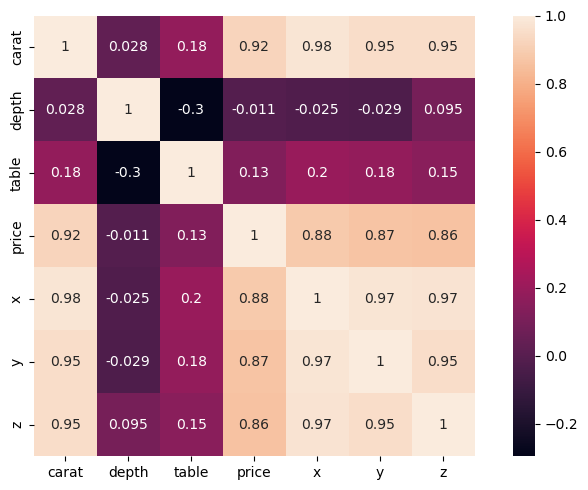

In [ ]:
## sekarang saya ingin mengetahui korelasi dari semua features

corr = df.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

terlihat sangat jelas bahwa korelasi tertinggi terhadap nilai dimensi x, y dan z adalah nilai carat.

In [ ]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53795 entries, 0 to 53814
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         53795 non-null  float64
 1   cut           53795 non-null  object 
 2   color         53795 non-null  object 
 3   depth         53795 non-null  float64
 4   table         53795 non-null  float64
 5   price         53795 non-null  int64  
 6   x             53795 non-null  float64
 7   y             53795 non-null  float64
 8   z             53795 non-null  float64
 9   clarity_I1    53795 non-null  int64  
 10  clarity_IF    53795 non-null  int64  
 11  clarity_SI1   53795 non-null  int64  
 12  clarity_SI2   53795 non-null  int64  
 13  clarity_VS1   53795 non-null  int64  
 14  clarity_VS2   53795 non-null  int64  
 15  clarity_VVS1  53795 non-null  int64  
 16  clarity_VVS2  53795 non-null  int64  
 17  outlier_x     53795 non-null  object 
 18  outlier_y     53795 non-nu

In [ ]:
diamond.describe()

,carat,depth,table,price,x,y,z,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,53795.000000,53795.000000,53795.000000,53795.000000,53795.000000,53795.000000,53795.000000,53795.000000,53795.000000,53795.000000,53795.000000,53795.000000,53795.000000,53795.000000,53795.000000
mean,0.797648,61.749066,57.456557,3930.554717,5.731499,5.734753,3.539941,0.013700,0.033182,0.242141,0.170443,0.151408,0.227345,0.067776,0.094005
std,0.473827,1.432447,2.234262,3987.448390,1.119444,1.140205,0.702562,0.116244,0.179112,0.428383,0.376025,0.358450,0.419121,0.251363,0.291838
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.040000,62.500000,59.000000,5321.500000,6.540000,6.540000,4.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


pada dataset di atas, nilai terendah carat adalah 0.2 carat dan nilai tertinggi adalah 5 carat. kemudian bisa dilihat juga nilai interval dari x, y dan z adalah 1,07 - 10.74, saya bulatkan menjadi 1 - 11. berarti jika ada nilai diluar itu, bisa jadi merupakan outlier. (nilai max dari kolom y dan z saya abaikan karna jelas merupakan outlier dari seluruh data yg ada. dibuktikan dari gambar boxplot, mean, median dan gambar dibawah yang menunjukan dimensi nilai dimensi untuk diamond 5 carat yaitu 11 mm)

![diamond.png](attachment:diamond.png)

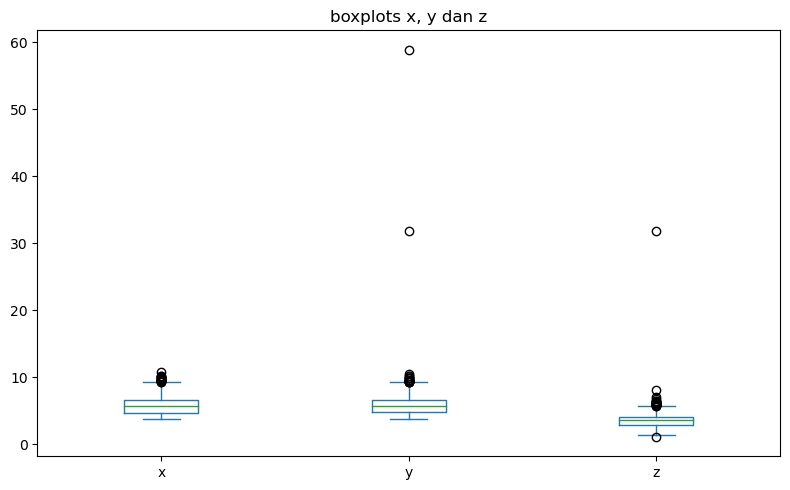

In [ ]:
plt.rcParams["figure.figsize"] = [8.0, 5.0]
plt.rcParams["figure.autolayout"] = True

diamond[['x', 'y', 'z']].plot(kind='box', title='boxplots x, y dan z')
plt.show()

berdasarkan gambar boxplot, bisa disimpulkan bahwa masih terdapat outlier pada kolom y dan kolom z. dari kesimpulan sebelumnya, nilai x, y dan z berada di interval 1-11. Maka:

In [ ]:
diamond[diamond['y']>11]

,carat,cut,color,depth,table,price,x,y,z,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,outlier_x,outlier_y,outlier_z
24005,2.00,Premium,H,58.9,57.0,12210,8.09,58.9,8.06,0,0,0,1,0,0,0,0,not-outlier,outlier,outlier
49072,0.51,Ideal,E,61.8,55.0,2075,5.15,31.8,5.12,0,0,0,0,1,0,0,0,not-outlier,outlier,not-outlier


In [ ]:
diamond[diamond['z']>11]

,carat,cut,color,depth,table,price,x,y,z,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,outlier_x,outlier_y,outlier_z
48297,0.51,Very Good,E,61.8,54.7,1970,5.12,5.15,31.8,0,0,0,0,1,0,0,0,not-outlier,not-outlier,outlier


ada 2 baris nilai outlier pada kolom y dan 1 baris nilai otlier pada kolom z. saya anggap itu nilai janggal yang harus dihilangkan, maka:

In [ ]:
diamond_new = diamond[(diamond[['y','z']]<11).all(axis=1)]

diamond_new

,carat,cut,color,depth,table,price,x,y,z,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,outlier_x,outlier_y,outlier_z
0,0.23,Ideal,E,61.5,55.0,326,3.95,3.98,2.43,0,0,0,1,0,0,0,0,not-outlier,not-outlier,not-outlier
1,0.21,Premium,E,59.8,61.0,326,3.89,3.84,2.31,0,0,1,0,0,0,0,0,not-outlier,not-outlier,not-outlier
2,0.23,Good,E,56.9,65.0,327,4.05,4.07,2.31,0,0,0,0,1,0,0,0,not-outlier,not-outlier,not-outlier
3,0.29,Premium,I,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0,0,not-outlier,not-outlier,not-outlier
4,0.31,Good,J,63.3,58.0,335,4.34,4.35,2.75,0,0,0,1,0,0,0,0,not-outlier,not-outlier,not-outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53810,0.72,Ideal,D,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,0,0,0,0,0,not-outlier,not-outlier,not-outlier
53811,0.72,Good,D,63.1,55.0,2757,5.69,5.75,3.61,0,0,1,0,0,0,0,0,not-outlier,not-outlier,not-outlier
53812,0.70,Very Good,D,62.8,60.0,2757,5.66,5.68,3.56,0,0,1,0,0,0,0,0,not-outlier,not-outlier,not-outlier
53813,0.86,Premium,H,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,1,0,0,0,0,not-outlier,not-outlier,not-outlier


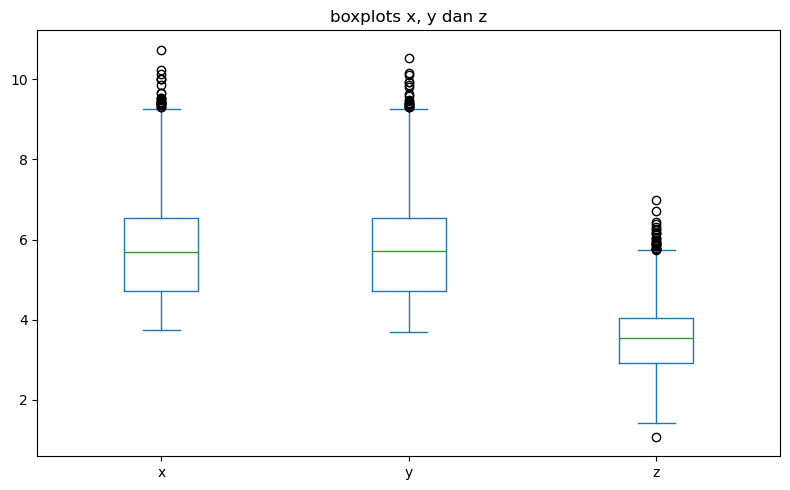

In [ ]:
plt.rcParams["figure.figsize"] = [8.0, 5.0]
plt.rcParams["figure.autolayout"] = True

diamond_new[['x', 'y', 'z']].plot(kind='box', title='boxplots x, y dan z')
plt.show()

Kesimpulan: Analisa outlier dari dimensi yang nilainya nol dan korelasi dimensi dengan carat. jika dijumlahkan, banyaknya outlier dari analisa ini adalah **23 baris outliers; 20 baris outlier bernilai 0 atau <1 dan 3 baris outlier bernilai >11**

## Thank you :)